In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [20]:
# Load the dataset
df = pd.read_csv('coconut_irrigation_data_with_water_level_8.csv')

In [21]:
df.head(2)

,Date,Soil Moisture (10 cm) (%),Soil Moisture (20 cm) (%),Soil Moisture (30 cm) (%),Plant Age (years),Temperature (°C),Humidity (%),Rainfall (mm),Rain Status (0/1),Irrigation Status (0/1),Water Level (liters)
0,2010-11-01,39.305028,34.187018,50.940124,6,32.752079,69.117342,0.0,0,0,18.835983
1,2019-01-18,27.621755,40.963801,38.589987,6,32.752079,69.117342,0.0,0,1,45.211560


In [22]:
# Convert Water Level (liters) to range categories
def categorize_water_level(water_level):
    if 50 <= water_level <= 100:
        return 1  # High water need
    elif 30 <= water_level < 50:
        return 2  # Moderate water need
    elif 10 <= water_level < 30:
        return 3  # Low water need
    else:
        return 0  # No water needed or out of defined range

In [23]:
# Apply the categorization function to the Water Level column
df['Water Level Category'] = df['Water Level (liters)'].apply(categorize_water_level)

In [24]:
Water_Level_Category_counts = df['Water Level Category'].value_counts()

In [25]:
# Prepare the features and target variable
X = df.drop(['Date','Rainfall (mm)' ,'Irrigation Status (0/1)' ,'Water Level (liters)','Water Level Category'], axis=1)  # Features
y = df['Water Level Category']                           # Target variable

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [28]:
# Function to evaluate and print model results
def evaluate_model(model):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['0', '1','2','3'], 
                 yticklabels=['0', '1','2','3'])
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Export the model
    model_filename = f"{model.__class__.__name__.lower()}water_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Model exported as: {model_filename}")

Model: RandomForestClassifier
Accuracy: 0.8947084233261339
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       476
           1       0.87      0.86      0.86       432
           2       0.82      0.82      0.82       474
           3       0.90      0.94      0.92       470

    accuracy                           0.89      1852
   macro avg       0.89      0.89      0.89      1852
weighted avg       0.90      0.89      0.89      1852



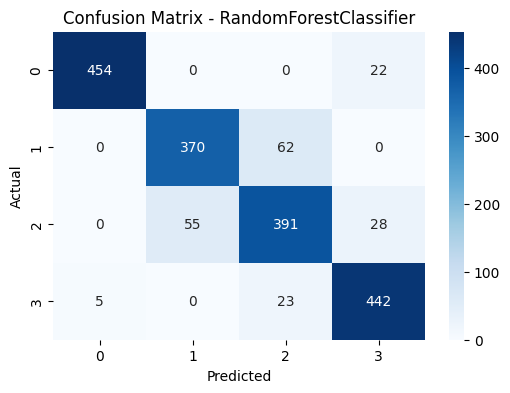

Model exported as: randomforestclassifierwater_model.pkl
Model: DecisionTreeClassifier
Accuracy: 0.8390928725701944
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       476
           1       0.81      0.81      0.81       432
           2       0.74      0.74      0.74       474
           3       0.85      0.86      0.86       470

    accuracy                           0.84      1852
   macro avg       0.84      0.84      0.84      1852
weighted avg       0.84      0.84      0.84      1852



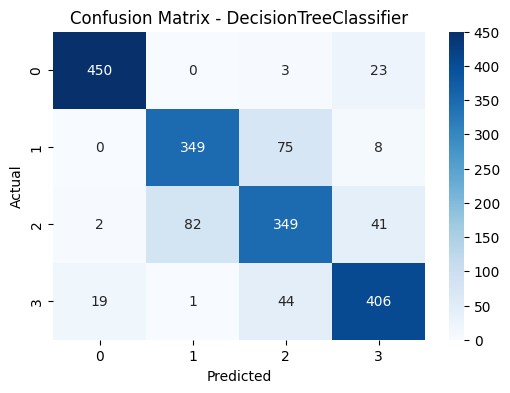

Model exported as: decisiontreeclassifierwater_model.pkl


c:\Users\sadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8023758099352052
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       476
           1       0.79      0.82      0.81       432
           2       0.68      0.66      0.67       474
           3       0.76      0.84      0.80       470

    accuracy                           0.80      1852
   macro avg       0.81      0.80      0.80      1852
weighted avg       0.81      0.80      0.80      1852



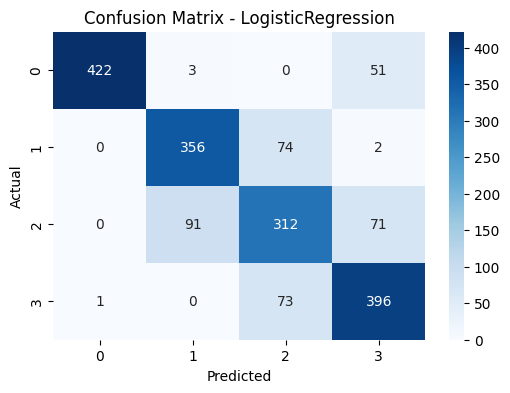

Model exported as: logisticregressionwater_model.pkl


In [29]:
# Create and evaluate models
models = [
    RandomForestClassifier( random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(max_iter=200, random_state=42)
]

for model in models:
    evaluate_model(model)


In [30]:
# Load the model and make predictions on new data
def load_model_and_predict(model_filename, new_data):
    # Load the model
    model = joblib.load(model_filename)
    
    # Make predictions
    predictions = model.predict(new_data)
    return predictions


In [31]:
df.head(2)

,Date,Soil Moisture (10 cm) (%),Soil Moisture (20 cm) (%),Soil Moisture (30 cm) (%),Plant Age (years),Temperature (°C),Humidity (%),Rainfall (mm),Rain Status (0/1),Irrigation Status (0/1),Water Level (liters),Water Level Category
0,2010-11-01,39.305028,34.187018,50.940124,6,32.752079,69.117342,0.0,0,0,18.835983,3
1,2019-01-18,27.621755,40.963801,38.589987,6,32.752079,69.117342,0.0,0,1,45.211560,2


In [32]:
# Generate new data
new_data = pd.DataFrame({
    'Soil Moisture (10 cm) (%)': [14.477],
    'Soil Moisture (20 cm) (%)': [24.64],
    'Soil Moisture (30 cm) (%)': [36.25],
    'Plant Age (years)': [5],
    'Temperature (°C)': [28.3],
    'Humidity (%)': [72.52],
    'Rain Status (0/1)': [0], 
})

In [33]:
predictions = load_model_and_predict('randomforestclassifierwater_model.pkl', new_data)
predictions

array([1])

In [34]:
# Convert range categories to Water Level (liters) range as a string
def get_water_level_range_string_from_category(category):
    if category == 1:
        return "50 - 100 (High water need)"  # High water need
    elif category == 2:
        return "30 - 50 (Moderate water need)"  # Moderate water need
    elif category == 3:
        return "10 - 30 (Low water need)"  # Low water need
    elif category == 0:
        return "0 - 0 (No water needed)"  # No water needed
    else:
        raise ValueError("Invalid category. Must be 0, 1, 2, or 3.")


In [35]:
prediction = get_water_level_range_string_from_category(predictions[0])
prediction

'50 - 100 (High water need)'